# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

### Observable Trends

1. From the regression analysis of max temp, humidity %, cloudiness %, and wind speed (mph) versus city latitudes for the north and south hemispheres, only the max temp versus latitude correlation coefficients proved to be somewhat meaningful (-.69 and .73). The other 3(6) correlation coefficients showed no meaningful correlation between their respective parameters and city latitudes. This relationship seems to indicate that only max temperatures may have a relationship with city latitude, while the other three do not. As per the relationship discovered, it seems the closer you get to 0 latitude, the warmer it gets, while the further you get from 0 latitude, (-90,90), the colder the max temp gets.

2. The plot that compares city latitude to the humidity percentage for each city on the date of analysis seems to show no observable relationship between latitude and humidity even with a linear regression involved, but it does seem to show that more cities have a humidity greater than 50% rather than lower than 50% regardless of hemisphere.

3. The wind speed (mph) vs latitude linear regression for the north and south hemispheres both seem to indicate that there is little to no correlation (.02 and .24, respectively) between a city's latitude and the wind speed. This shows that there is no visible relationship between a city's latitude and its wind speed (mph) regardless of hemisphere. It does seem to show that a large majority of cities have wind speeds below 15 mph regardless of latitude and hemisphere on the date of analysis.

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from API_Keys import api_key, gkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../Output_Data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [12]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], 1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], 1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

639

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# Set up lists to hold reponse info
working_city = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
counter = 0

# Use a for loop to add the lat and temp for each city in cities list
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        working_city.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        counter += 1
        print(f'Processing record {counter} for city: {city}')
    except:
        print(f'City information not found. Skipping...')
print('-------------------------------------------------')
print(f'The total number of cities found was: {counter}')

Processing record 1 for city: albany
Processing record 2 for city: avarua
Processing record 3 for city: orocue
Processing record 4 for city: husavik
Processing record 5 for city: bluff
Processing record 6 for city: mataura
Processing record 7 for city: castro
City information not found. Skipping...
Processing record 8 for city: mehamn
Processing record 9 for city: atambua
Processing record 10 for city: saint-francois
Processing record 11 for city: punta arenas
Processing record 12 for city: lebu
Processing record 13 for city: rikitea
Processing record 14 for city: yangambi
Processing record 15 for city: saint-philippe
Processing record 16 for city: thompson
Processing record 17 for city: vallenar
Processing record 18 for city: ushuaia
Processing record 19 for city: jamestown
Processing record 20 for city: georgetown
Processing record 21 for city: vaini
Processing record 22 for city: tome
Processing record 23 for city: kautokeino
Processing record 24 for city: ancud
City information not

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
#Put the API response into a DataFrame
city_data = pd.DataFrame({
    'City': working_city,
    'Lat': lat,
    'Lng': lng,
    'Max Temp (F)': max_temp,
    'Humidity (%)': humidity,
    'Cloudiness (%)': cloudiness,
    'Wind Speed (mph)': wind_speed,
    'Country': country,
    'Date': date
})

#Export the DataFrame into the csv path file
city_data.to_csv(output_data_file, index_label='City ID')

city_data

,City,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,Albany,42.6001,-73.9662,81.45,55,42,1.99,US,1661625729
1,Avarua,-21.2078,-159.7750,73.45,73,19,9.22,CK,1661625754
2,Orocué,4.7912,-71.3354,88.39,57,30,3.33,CO,1661626037
3,Husavik,66.0449,-17.3389,48.74,67,14,4.72,IS,1661626038
4,Bluff,-46.6000,168.3333,46.80,74,100,1.41,NZ,1661626038
...,...,...,...,...,...,...,...,...,...
589,Douglas,41.3000,-96.1670,85.87,56,0,12.66,US,1661626240
590,Soligalich,59.0778,42.2864,72.19,48,94,7.38,RU,1661626241
591,Jiuquan,39.7432,98.5174,64.81,51,100,7.54,CN,1661626241
592,Kamsack,51.5667,-101.9009,77.41,55,17,11.74,CA,1661626242


In [15]:
# Summary Statistics
city_data.describe()

,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
count,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,5.940000e+02
mean,18.894813,12.997926,69.956566,69.739057,55.424242,8.210572,1.661626e+09
std,32.806403,89.381953,14.918459,21.397331,40.290243,5.644966,9.139911e+01
min,-54.800000,-179.166700,34.410000,10.000000,0.000000,0.000000,1.661626e+09
25%,-8.229600,-65.438550,58.140000,57.000000,13.000000,4.270000,1.661626e+09
50%,21.138950,15.399750,72.505000,74.000000,61.500000,6.920000,1.661626e+09
75%,45.995000,88.127550,80.557500,86.000000,100.000000,10.842500,1.661626e+09
max,78.218600,179.316700,102.250000,100.000000,100.000000,33.380000,1.661626e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [21]:
# Check to see if there is any cities with Humidity > 100
city_data['Humidity (%)'].max()
# Skip this step as 100 is the max

100

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [56]:
# Set the necessary variables
x = city_data.Lat
t = city_data['Max Temp (F)']
h = city_data['Humidity (%)']
c = city_data['Cloudiness (%)']
w = city_data['Wind Speed (mph)']
doa = '(08/27/22)'

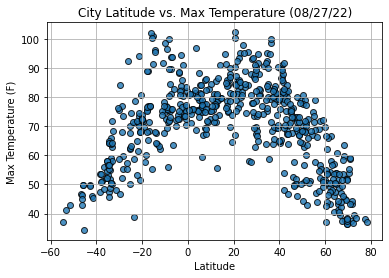

In [41]:
plt.scatter(x,t,edgecolors="black",alpha=.8)
plt.title(f'City Latitude vs. Max Temperature {doa}')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')


plt.savefig('../Output_Data/LatitudevsTemp.png')
plt.show()

The plot above compares city latitude to max temperature for each city on the date of analysis. It seems to indicate as you get closer to the equator (0), the warmer the max temperature is. The further you get away from the equator (-90,90), the colder the max temperature is.

## Latitude vs. Humidity Plot

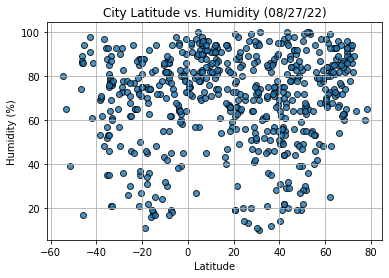

In [42]:
plt.scatter(x,h,edgecolors="black",alpha=.8)
plt.title(f'City Latitude vs. Humidity {doa}')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.savefig('../Output_Data/LatitudevsHumidity.png')
plt.show()

The plot above compares city latitude to the humidity percentage for each city on the date of analysis. It seems to show no observable relationship between latitude and humidity, but it does seem to show that more cities have a humidity greater than 50% rather than lower than 50%.

## Latitude vs. Cloudiness Plot

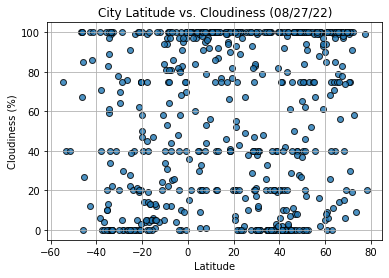

In [43]:
plt.scatter(x,c,edgecolors="black",alpha=.8)
plt.title(f'City Latitude vs. Cloudiness {doa}')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.savefig('../Output_Data/LatitudevsCloudiness.png')
plt.show()

The plot above compares city latitude to the cloudiness percentage for each city on the date of analysis. It seems to show no observable trends.

## Latitude vs. Wind Speed Plot

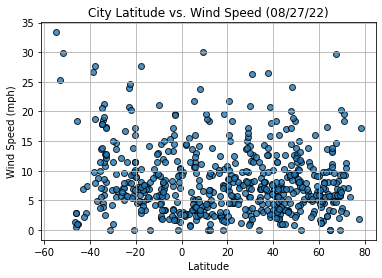

In [44]:
plt.scatter(x,w,edgecolors="black",alpha=.8)
plt.title(f'City Latitude vs. Wind Speed {doa}')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.savefig('../Output_Data/LatitudevsWindSpeed.png')
plt.show()

The plot above compares city latitude to the wind speed in mph for each city on the date of analysis. It seems to show that a large majority of cities have wind speeds below 15 mph regardless of latitude.

## Linear Regression

In [74]:
# Seperate city data by hemispheres
city_data_north = city_data.loc[city_data['Lat'] >= 0]
x_north = city_data_north.Lat
t_north = city_data_north['Max Temp (F)']
h_north = city_data_north['Humidity (%)']
c_north = city_data_north['Cloudiness (%)']
w_north = city_data_north['Wind Speed (mph)']

city_data_south = city_data.loc[city_data['Lat'] < 0]
x_south = city_data_south.Lat
t_south = city_data_south['Max Temp (F)']
h_south = city_data_south['Humidity (%)']
c_south = city_data_south['Cloudiness (%)']
w_south = city_data_south['Wind Speed (mph)']

doa = '(08/27/22)'

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient (r) is: -0.6893572942180769


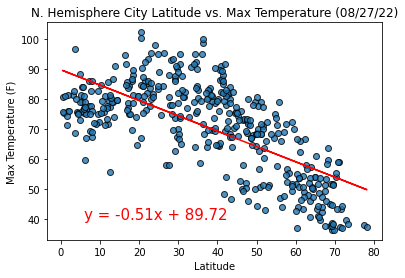

In [85]:
# Plot the scatter plot
plt.scatter(x_north,t_north,edgecolors="black",alpha=.8)
plt.title(f'N. Hemisphere City Latitude vs. Max Temperature {doa}')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Perform and plot the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north, t_north)
regress_values = x_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_north,regress_values,"r-")
plt.annotate(line_eq,(5.8,40),fontsize=15,color="red")
print(f"The correlation coefficient (r) is: {rvalue}")

plt.savefig('../Output_Data/NorthHemiLatitudevsTemp.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient (r) is: 0.7325830716358077


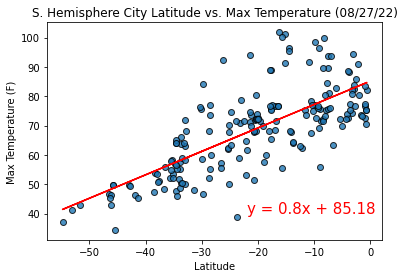

In [86]:
# Plot the scatter plot
plt.scatter(x_south,t_south,edgecolors="black",alpha=.8)
plt.title(f'S. Hemisphere City Latitude vs. Max Temperature {doa}')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Perform and plot the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south, t_south)
regress_values = x_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_south,regress_values,"r-")
plt.annotate(line_eq,(-22,40),fontsize=15,color="red")
print(f"The correlation coefficient (r) is: {rvalue}")

plt.savefig('../Output_Data/SouthHemiLatitudevsTemp.png')
plt.show()

The max temp vs latitude linear regression for the north and south hemisphere analyzes whether there is a relationship between the latitude of a city and the max temperature that it has. By splitting the cities by hemisphere, we can see that there is a somewhat meaningful negative correlation (-0.69) between northern hemisphere latitudes and northern hemisphere max temperatures, while there is a somewhat meaningful positive correlation (0.73) between southern hemisphere latitudes and southern hemisphere max temperatures. This indicates that as latitude increases from 0 to 90 degrees latitude, the max temperature should generally decrease as well. On the other hand, as latitude increases from -90 to 0 degrees latitude, the max temperature should generally increase. Overall, it seems that as latitudes get closer to 0 degrees latitude, that should be the area in which max temps are the highest.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient (r) is: -0.040459440276387613


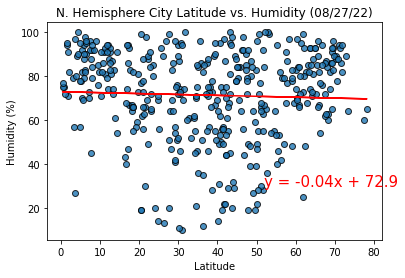

In [90]:
# Plot the scatter plot
plt.scatter(x_north,h_north,edgecolors="black",alpha=.8)
plt.title(f'N. Hemisphere City Latitude vs. Humidity {doa}')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Perform and plot the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north, h_north)
regress_values = x_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_north,regress_values,"r-")
plt.annotate(line_eq,(52,30),fontsize=15,color="red")
print(f"The correlation coefficient (r) is: {rvalue}")

plt.savefig('../Output_Data/NorthHemiLatitudevsHumidity.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient (r) is: -0.03394182068056381


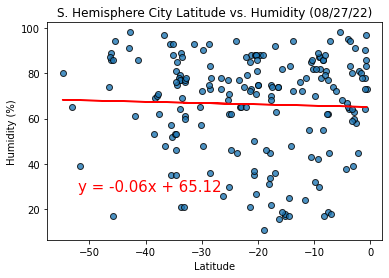

In [93]:
# Plot the scatter plot
plt.scatter(x_south,h_south,edgecolors="black",alpha=.8)
plt.title(f'S. Hemisphere City Latitude vs. Humidity {doa}')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Perform and plot the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south, h_south)
regress_values = x_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_south,regress_values,"r-")
plt.annotate(line_eq,(-52,28),fontsize=15,color="red")
print(f"The correlation coefficient (r) is: {rvalue}")

plt.savefig('../Output_Data/SouthHemiLatitudevsHumidity.png')
plt.show()

The humidity % vs latitude linear regression for the north and south hemispheres both seem to indicate that there is little to no correlation (-.04 and -.03, respectively) between a city's latitude and the humidity %. This shows that there is no visible relationship between a city's latitude and its humidity % regardless of hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient (r) is: -0.009732732826289359


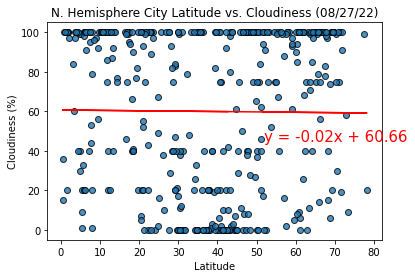

In [97]:
# Plot the scatter plot
plt.scatter(x_north,c_north,edgecolors="black",alpha=.8)
plt.title(f'N. Hemisphere City Latitude vs. Cloudiness {doa}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Perform and plot the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north, c_north)
regress_values = x_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_north,regress_values,"r-")
plt.annotate(line_eq,(52,45),fontsize=15,color="red")
print(f"The correlation coefficient (r) is: {rvalue}")

plt.savefig('../Output_Data/NorthHemiLatitudevsCloudiness.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient (r) is: 0.12715538941197507


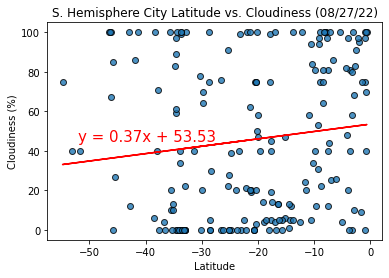

In [99]:
# Plot the scatter plot
plt.scatter(x_south,c_south,edgecolors="black",alpha=.8)
plt.title(f'S. Hemisphere City Latitude vs. Cloudiness {doa}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Perform and plot the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south, c_south)
regress_values = x_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_south,regress_values,"r-")
plt.annotate(line_eq,(-52,45),fontsize=15,color="red")
print(f"The correlation coefficient (r) is: {rvalue}")

plt.savefig('../Output_Data/SouthHemiLatitudevsCloudiness.png')
plt.show()

The cloudiness % vs latitude linear regression for the north and south hemispheres both seem to indicate that there is little to no correlation (-.01 and .12, respectively) between a city's latitude and the cloudiness %. This shows that there is no visible relationship between a city's latitude and its cloudiness % regardless of hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient (r) is: 0.01791927877461574


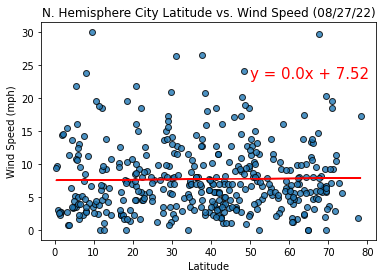

In [101]:
# Plot the scatter plot
plt.scatter(x_north,w_north,edgecolors="black",alpha=.8)
plt.title(f'N. Hemisphere City Latitude vs. Wind Speed {doa}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Perform and plot the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north, w_north)
regress_values = x_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_north,regress_values,"r-")
plt.annotate(line_eq,(50,23),fontsize=15,color="red")
print(f"The correlation coefficient (r) is: {rvalue}")

plt.savefig('../Output_Data/NorthHemiLatitudevsWindSpeed.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient (r) is: -0.2383851840059213


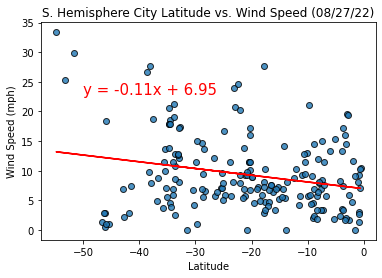

In [102]:
# Plot the scatter plot
plt.scatter(x_south,w_south,edgecolors="black",alpha=.8)
plt.title(f'S. Hemisphere City Latitude vs. Wind Speed {doa}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Perform and plot the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south, w_south)
regress_values = x_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_south,regress_values,"r-")
plt.annotate(line_eq,(-50,23),fontsize=15,color="red")
print(f"The correlation coefficient (r) is: {rvalue}")

plt.savefig('../Output_Data/SouthHemiLatitudevsWindSpeed.png')
plt.show()

The wind speed (mph) vs latitude linear regression for the north and south hemispheres both seem to indicate that there is little to no correlation (.02 and .24, respectively) between a city's latitude and the wind speed. This shows that there is no visible relationship between a city's latitude and its wind speed (mph) regardless of hemisphere.